This is a written assignment, but you will use a notebook for some steps and can use the notebook for
everything if you like. But you turn in the results in class or by scan/photo and dropbox. 

We are going to verify several statistical ideas for a data set we are going to generate. Let a,b,c,d be the
last 4 non-zero digits of your banner enumber. For example, if your Enumber is E99943040, then a=9,
b=4, c=3, and d=4. If you only have 3 non-zero digits, then repeat the last one for d. You will be forming
numbers using these digits. For example, abc is the number 943, whereas abc12 is 94312. However,
abc+12 is the number 943 + 12 = 955. 

My Enumber is E00404624, and therefore a = 4, b = 6, c = 2, d = 4. 

Starting with $x_n = abc$. Generate 50 numbers using the formula
$$x_n = ab * x_n \% \ bcd1$$
and then divide each by bcd1 (Note: bcd1 is a 4 digit number, and the equation should be interpreted as
“the next” $x_n$ is given by the right hand side in terms of the current $x_n$). In Python, this is implemented
as (with digits filled for you)

In [1]:
from __future__ import division

%pylab inline

import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
abc = 462
xn = abc
Data = zeros(50)
bcd1 = 6241
ab = 46

for i in range(50):
    Data[i] = xn/bcd1
    xn = ab * xn % bcd1

Data

array([ 0.0740266 ,  0.40522352,  0.64028201,  0.45297228,  0.83672488,
        0.48934466,  0.50985419,  0.45329274,  0.85146611,  0.16744112,
        0.7022913 ,  0.30539978,  0.04838968,  0.22592533,  0.39256529,
        0.05800353,  0.66816215,  0.73545906,  0.83111681,  0.23137318,
        0.64316616,  0.58564333,  0.93959301,  0.22127864,  0.1788175 ,
        0.22560487,  0.37782407,  0.37990707,  0.47572504,  0.88335203,
        0.63419324,  0.17288896,  0.95289216,  0.83303958,  0.31982054,
        0.71174491,  0.74026598,  0.05223522,  0.40282006,  0.5297228 ,
        0.36724884,  0.89344656,  0.0985419 ,  0.53292742,  0.51466111,
        0.67441115,  0.02291299,  0.05399776,  0.48389681,  0.25925332])

Algorithms like this are used to generate numbers that are approximately uniformly random. This
particular algorithm is the “Linear Congruential generator” and is very old and somewhat unreliable.
Sometimes it produces very random numbers, and sometimes not so random. So I do not know how
random your results are going to be, if at all! This assignment asks you to calculate several quantities
and form an opinion as to how “random” the results are for your generated data:

Do each of the following, explaining each step fully. For recording results, only 5 decimal places of
accuracy are required. 

[1] (5 points) Write down what you used for abc and for bcd1. Write down the 50 points in your
Data in ascending order (smallest to largest). (Hint: see the sort command in Python)

In [3]:
print("abc is {abc}".format(abc=462))

print("bcd1 is {bcd1}".format(bcd1=6241))

sort(Data)

abc is 462
bcd1 is 6241


array([ 0.02291299,  0.04838968,  0.05223522,  0.05399776,  0.05800353,
        0.0740266 ,  0.0985419 ,  0.16744112,  0.17288896,  0.1788175 ,
        0.22127864,  0.22560487,  0.22592533,  0.23137318,  0.25925332,
        0.30539978,  0.31982054,  0.36724884,  0.37782407,  0.37990707,
        0.39256529,  0.40282006,  0.40522352,  0.45297228,  0.45329274,
        0.47572504,  0.48389681,  0.48934466,  0.50985419,  0.51466111,
        0.5297228 ,  0.53292742,  0.58564333,  0.63419324,  0.64028201,
        0.64316616,  0.66816215,  0.67441115,  0.7022913 ,  0.71174491,
        0.73545906,  0.74026598,  0.83111681,  0.83303958,  0.83672488,
        0.85146611,  0.88335203,  0.89344656,  0.93959301,  0.95289216])

[2] (5 points) Calculate the mean and standard deviation of your Data. 

In [4]:
print "mean of Data is %.3f." % mean(Data)
# print "He's got %s eyes and %s hair." % (my_eyes, my_hair)
print "standard deviation of Data is %.3f." % std(Data)

mean of Data is 0.465.
standard deviation of Data is 0.269.


[3] (5 points) Calculate the variance of your Data.

In [5]:
print "variance of Data is %.3f." % var(Data)

variance of Data is 0.072.


[4] (5 points) Let X be associated with the numbers in your Data. If each number in Data is equally likely, then explain what we mean by Pr( X = x ). Illustrate with an example from your Data. 

In [6]:
import random
n = 10
X = np.random.choice(Data, n, replace=False)
X

array([ 0.83303958,  0.05399776,  0.64316616,  0.83111681,  0.50985419,
        0.85146611,  0.5297228 ,  0.0740266 ,  0.05800353,  0.73545906])

In [8]:
count = 0
loop_num = 100000
for x in range(loop_num):
    sample = random.choice(Data)
    if sample in X:
        count = count + 1
prob_loop = count/loop_num
print "the computing probability (sample %d times) of Data is %.3f." % (loop_num, prob_loop)

the computing probability (sample 100000 times) of Data is 0.199.


In [12]:
prob_freq = len(X)/len(Data)
print "the theoretical probability of Data is %.3f." % prob_freq

the theoretical probability of Data is 0.200.


My understanding of Pr( X = x ) is when we sample from the sample space, the chance of sampling that matches what we have in event X. Theoretically, it is the number of elements in X divided by the number of elements in the universal set. As we see the computed probability is very close to theoretical one (0.19815 vs 0.2), given sample size (100000 times) is large enough. 

[5] (5 points) Given that each point in Data is equally likely, calculate Pr($X \geq \frac{1}{2}$). Explain why it
would make no sense for me to ask you for the probability that $x \geq \frac{1}{2}$ (x is lowercase).
(Hint: #1 might come in handy). 

In [13]:
prob_half = len(Data[Data>=0.5])/len(Data)
print "the probability that X is greater and equal than half is %.3f." % prob_half

the probability that X is greater and equal than half is 0.440.


By convention, upper case variables denote random variables while a particular instantiation of the random variable is denoted as lower case letters. 

Since lower case x is a non-random, fixed value, $x \geq \frac{1}{2}$ can only be 0 or 1. We want to calculate the chance of event based on random sampling. 

As we see in #1, the lower case x is just the labler (index) while the X is random variable. 

[6] (5 points) Explain why the following is a probability density function.

$$p(x) = \left\{\begin{matrix}
1 & if \ 0 \leqslant x \leqslant 1\\ 
0 & otherwise
\end{matrix}\right.$$

What is its cumulative distribution function?
 

It is valid PDF, since: 
1. it's non-negative
2. it integrates to one (proof below)
$$\begin{align*}
pr(x) &=\int_I p(x)d(x) \\ 
 &= \int_0^1 1 d(x) + \int_{elsewhere}0d(x)\\ 
 &= 1-0+0\\
 &= 1
\end{align*}$$

CDF is calculated on $P(x) =\int_{-\infty}^x  p(x)d(x)$

we plug in the domain of x and we have: 
$$P(x)=
\left\{\begin{matrix}
0 & x < 0\\ 
1 & 0 \leqslant x \leqslant 1\\ 
1 & x > 1 
\end{matrix}\right.$$

[7] (5 points) What is Pr( 1/a < X < 1 )? 

In [14]:
a = 4
index = ((Data > 1/a) & (Data < 1))
prob_a = len(Data[index])/len(Data)
print "the probability that X is greater than %.1f and smaller than 1 is %.3f." % (1/a, prob_a)

the probability that X is greater than 0.2 and smaller than 1 is 0.720.


[8] (5 points) Calculate the expected value of the probability density function for uniformly random
variables, where the density is in #6.

$$\begin{align*}
\mu = E(x) &=\int_I xp(x)d(x) \\ 
 &= \int_0^1 x d(x) + \int_{elsewhere}0d(x)\\ 
 &= \frac{1^2}{2}-0+0\\
 &= \frac{1}{2}
\end{align*}$$

[9] (5 points) Calculate the variance of the probability density function for uniformly random
variables, where the density is in #6. 

$$\begin{align*}
Var(x) &=\int_I (x-\mu)^2 p(x)d(x) \\ 
 &= \int_0^1 (x-\frac{1}{2})^2 d(x) + \int_{elsewhere}0d(x)\\ 
 &= \frac{1^3}{3} - \frac{1^2}{2} + \frac{1}{4}\\
 &= \frac{1}{12}
\end{align*}$$

[10] (5 points) How close is the variance of the Data in 2 to the variance of the uniform distribution,
whose variance you calculated in #9? In your opinion, how good is the linear congruential
random number generator based on your enumber? Feel free to use histograms, other
statistics, etcetera to support your conclusions. 

In [15]:
print "the variance of data is %f" %var(Data) 
print "the variance of the probability density function for uniformly random variables is %f" %float(1/12)

the variance of data is 0.072434
the variance of the probability density function for uniformly random variables is 0.083333


(array([ 7.,  3.,  5.,  6.,  6.,  5.,  5.,  5.,  4.,  4.]),
 array([ 0.02291299,  0.11591091,  0.20890883,  0.30190675,  0.39490466,
         0.48790258,  0.5809005 ,  0.67389841,  0.76689633,  0.85989425,
         0.95289216]),
 <a list of 10 Patch objects>)

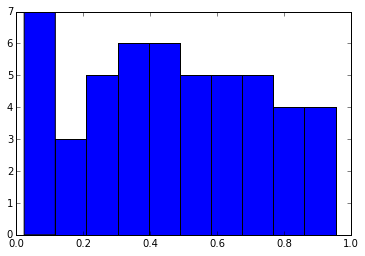

In [16]:
import matplotlib.pyplot as plt
plt.hist(Data)

(array([ 106.,   83.,  106.,  107.,   86.,  103.,  118.,   94.,   89.,  108.]),
 array([  1.44371627e-04,   1.00080683e-01,   2.00016995e-01,
          2.99953307e-01,   3.99889618e-01,   4.99825930e-01,
          5.99762241e-01,   6.99698553e-01,   7.99634865e-01,
          8.99571176e-01,   9.99507488e-01]),
 <a list of 10 Patch objects>)

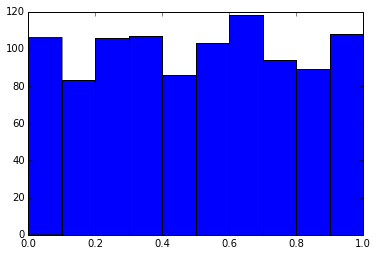

In [17]:
n = 1000
uniform_data = np.random.uniform(0,1,n)
plt.hist(uniform_data)

Graphically, our data distribution is somewhat close to uniform distribution

In [18]:
from scipy import stats
statistics, pvalue = stats.kstest(Data, 'uniform')
print "the Kolmogorov Smirnov test statistics is %.4f and the p-value is %.4f" %(statistics, pvalue)


the Kolmogorov Smirnov test statistics is 0.1071 and the p-value is 0.5930


Since the null hypothesis of Kolmogorov Smirnov test is that the two distributions are identical. The large p-value implies that we cannot reject the null hypothesis and conlude that the linear congruential random number generator based on my enumber is drawn from uniform distribution. Thus, statistically it is also proved to be a good way to sample uniform distributed data based on E-numbers. 